<center>
<![image.png](attachment:image.png)>
<img src="https://scontent.flis7-1.fna.fbcdn.net/v/t39.30808-6/327345211_708012977623591_5371889953719216000_n.png?_nc_cat=104&ccb=1-7&_nc_sid=5f2048&_nc_eui2=AeGA4Epi5DPgQWGmwJnzDzYwlTHqnE4dPp2VMeqcTh0-ndnVzTPGmZ1C7LYJvEsh0wc&_nc_ohc=eYml-GYudcEAX9U9ExD&_nc_ht=scontent.flis7-1.fna&oh=00_AfAgCk0A9S9vX7079OukWAoqEYq0-hGrKIHFbkcpZIhmpA&oe=6535741F" width="570" height="250"/></left>
<h1><center><font size=8>Natural Language Processing NLP</center></font></h1>
<h1><center>Basic preprocessing procedures</center></h1>
________________________________________________________________________________________________________

# Introduction

## Brief Overview of NLP

Natural Language Processing (NLP) is a subfield of artificial intelligence that focuses on the interaction between computers and humans through natural language. The ultimate objective of NLP is to enable computers to understand, interpret, and respond to human languages in a way that is both meaningful and useful. NLP encompasses a wide range of tasks, including but not limited to text analysis, language modeling, and machine translation.

## Importance of Data Pre-Processing in NLP

Data pre-processing is a crucial step in the NLP pipeline. Raw text data is often messy and unstructured, containing elements like special characters, numbers, and irrelevant whitespaces. Cleaning and structuring this data is essential for the performance of subsequent tasks, such as text analysis and machine learning modeling.

In this notebook, we will walk through the fundamental steps of data pre-processing in NLP, starting from data collection and cleaning to more advanced techniques like tokenization and text vectorization. By the end of this notebook, you will have a solid foundation in NLP and be equipped with the skills needed to preprocess text data


# **0.Setting Up the Environment**

Before diving into the code, it's essential to set up your environment with the necessary libraries and packages. This ensures that you have all the tools needed to perform various NLP tasks.

## Installing Necessary Libraries

We'll be using a few popular libraries for this notebook:

- **NLTK (Natural Language Toolkit)**: A leading platform for building Python programs to work with human language data.
- **spaCy**: An open-source software library for advanced natural language processing.
- **scikit-learn**: A machine learning library that features various classification, regression, and clustering algorithms.

You can install these libraries using `pip` by running the following commands:

```python
!pip install pandas
!pip install numpy
!pip install nltk
!pip install spacy
!pip install scikit-learn

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

import nltk
import spacy
import sklearn

ModuleNotFoundError: No module named 'spacy'

## Libraries for Data Visualization

Visualizing your data can provide valuable insights and help you make better decisions during the data pre-processing and modeling stages. For this notebook, we'll be using the following libraries for data visualization:

- **Matplotlib**: A 2D plotting library which produces publication-quality figures in a variety of formats and interactive environments across platforms.
- **Seaborn**: A statistical data visualization library based on Matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.
- **WordCloud**: A simple word cloud generator used to visualize the most frequent words in a corpus.

You can install these libraries using `pip` by running the following commands:

```python
!pip install matplotlib
!pip install seaborn
!pip install wordcloud


In [9]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [10]:
import warnings
warnings.filterwarnings("ignore")


# **1. Data Collection - Methods for Collecting Text Data**

Data is the backbone of any NLP project. There are various ways to collect text data depending on your project needs. In this section, we'll explore some common methods for data collection and how to load this data into our notebook.


### Loading Data into the Notebook

Once you've collected your data, the next step is to load it into your notebook for analysis. The method for loading data will depend on the format of your data file. Here are some common methods:

Loading a CSV File

In [16]:
# Load the CSV file into a DataFrame
df1 = pd.read_csv('your_file.csv')

# Display the first few rows of the DataFrame
df1.head()


### Loading a Text File

In [ ]:
# Open the text file and read its contents
with open('your_file.txt', 'r') as file:
    text_data = file.read()

# Display the first 500 characters in the text
print(text_data[:500])

### Reading Text Directly

Sometimes, you may want to quickly test an NLP algorithm or data pre-processing technique on a small piece of text. Python's built-in `input()` function allows you to read text directly from the user.

Here's a simple example:

In [17]:
# Reading text directly from the user
user_input = input("your_text")

# Displaying the entered text
print(f"You entered: {user_input}")


### Web Scraping

Web scraping is a technique for extracting information from websites. Libraries like *BeautifulSoup* and *Scrapy* are commonly used for this purpose.

#### *BeautifulSoup*
To install BeautifulSoup, run:
!pip install beautifulsoup4

#### *Scrapy*
To install Scrapy, run:
!pip install scrapy

# **2. Data Exploration**

Data exploration is a crucial step in any NLP project. It helps us understand the characteristics of the text data we are working with. In this section, we'll use a sample text to demonstrate some basic data exploration techniques.

## Sample Text

Our sample text is:

*"A UC de Introducão à Ciência de Dados desenvolve valências fundamentais na formação em ciência de dados, nomeadamente na capacidade de extrair conhecimento de diversos conjuntos de dados, através da aplicação de técnicas e metodologias, para responder a problemas e desafios concretos das pessoas, das organizações (públicas e privadas) e do território."*

In [91]:
# Sample text
sample_text = "A UC de Introducão à Ciência de Dados, do 1º ano do Mestrado de Ciência de Dados para Ciências Sociais, desenvolve valências fundamentais na formação em ciência de dados. Capacita os estudantes para a extração de conhecimento a partir de diversos conjuntos e fontes de dados."

## **2.1. Feature Extraction**
Now, let's proceed to extract the following features from the sample text:
1. Number of words
2. Number of characters
3. Number of sentences 
4. Average word length
5. Number of stopwords
6. Number of special characters
7. Number of numerics
8. Number of uppercase words

### Number of Words
The code snippet calculates the number of words in the given sample text

In [25]:
# Number of words
num_words = len(sample_text.split())
num_words

46

**Words Frequency Distribution**

The code snippet counts the frequency of each word in the given sample text and plots the top 10 most frequent words


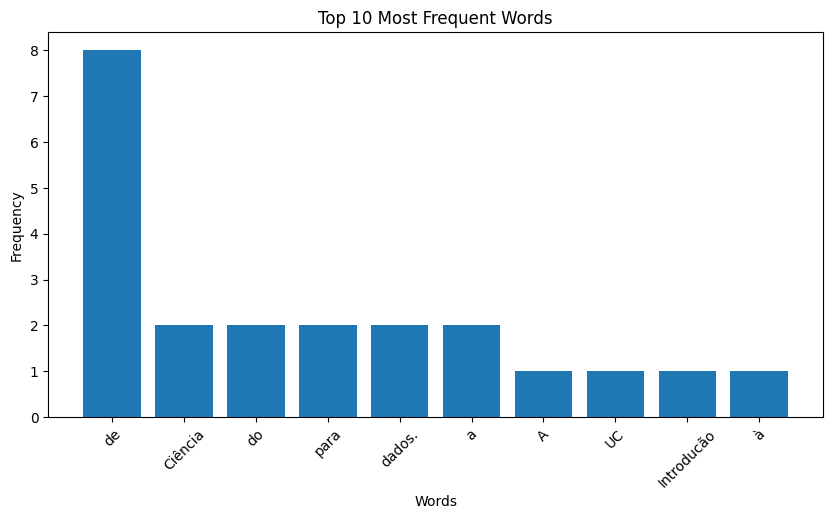

In [26]:
from collections import Counter

# Tokenize the text into words
words = sample_text.split()

# Count the frequency of each word
word_freq = Counter(words)

# Prepare data for plotting
labels, values = zip(*word_freq.items())

# Sort the values in descending order
indSort = sorted(range(len(values)), key=lambda k: values[k], reverse=True)

# Rearrange the data
labels = [labels[i] for i in indSort]
values = [values[i] for i in indSort]

# Create the plot
plt.figure(figsize=(10, 5))
plt.bar(labels[:10], values[:10])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()


### Unique Words
Understanding the size of the vocabulary and the unique words can be useful for various NLP tasks.

In [ ]:
# Calculate the number of unique words
unique_words = set(sample_text)
vocab_size = len(unique_words)

print(f"Number of unique words: {vocab_size}")


Number of unique words: 30


### Number of Characters
The code snippet calculates the number of characters in the given sample text.

In [27]:
# Number of characters
num_characters = len(sample_text)
num_characters

275

**Character Frequency Distribution**

Visualizing the data can provide additional insights. Let's create a simple word frequency distribution

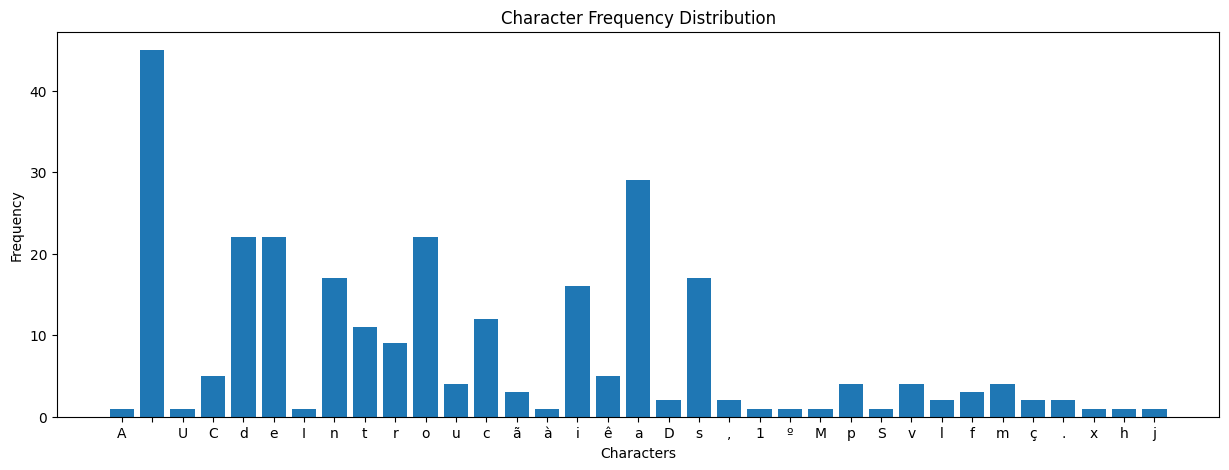

In [28]:
# Count the frequency of each character
char_freq = Counter(sample_text)

# Prepare data for plotting
char_labels, char_values = zip(*char_freq.items())

# Create the plot
plt.figure(figsize=(15, 5))
plt.bar(char_labels, char_values)
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.title('Character Frequency Distribution')
plt.show()


### Average Word Length
The code snippet calculates the average length of words in the given sample text.


In [29]:
# Average word length
avg_word_length = sum(len(word) for word in sample_text.split()) / num_words
avg_word_length

5.0

### Number of sentences 
To count the number of sentences in a text

In [182]:
# Number of sentences in the text
num_sentences = sample_text.count('.') + sample_text.count('!') + sample_text.count('?')
num_sentences


2

### Number of Stopwords
The code snippet calculates the number of stopwords in the given sample text. Stopwords are commonly used words that are generally ignored in text data analysis.

First, make sure to import the stopwords from the nltk.corpus package, then, you can proceed with the following code:

In [30]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# Number of stopwords
stop_words = set(stopwords.words('portuguese'))
num_stopwords = len([word for word in sample_text.lower().split() if word in stop_words])
num_stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JLM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


20

### Number of Special Characters
The code snippet calculates the number of special characters (like punctuation marks) in the given sample text.

First, make sure to import the string module, then, you can proceed with the following code:

In [31]:
import string
# Number of special characters
num_special_characters = len([char for char in sample_text if char in string.punctuation])
num_special_characters

4

### Number of Numerics
The code snippet calculates the number of numeric characters in the given sample text.

In [32]:
# Number of numerics
num_numerics = len([char for char in sample_text if char.isdigit()])
num_numerics

1

### Number of Uppercase Words
The code snippet calculates the number of words that are entirely in uppercase in the given sample text.

In [33]:
# Number of uppercase words
num_uppercase_words = len([word for word in sample_text.split() if word.isupper()])
num_uppercase_words

2

### Word Cloud

A word cloud can give us a visual representation of the most frequent words in the text.

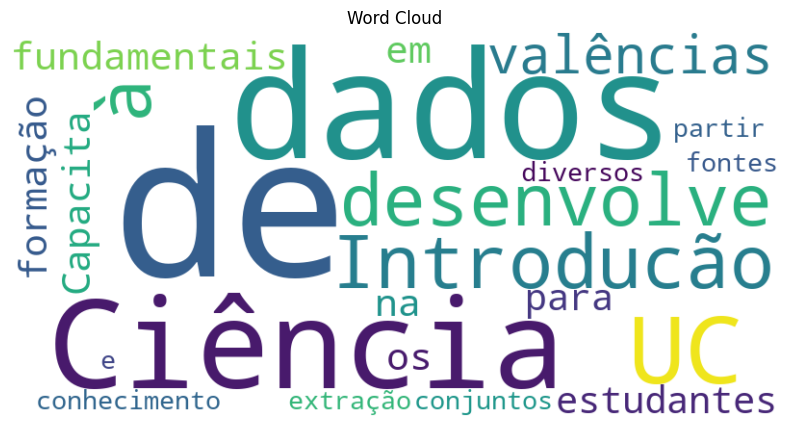

In [186]:
from wordcloud import WordCloud

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sample_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


## **2.2. Basic Text Pre-processing**
Next, we'll perform some basic text pre-processing on the sample text. The steps include:
1. Case Normalization-Lower casing
2. Punctuation removal
3. Stopwords removal
4. Frequent words removal
5. Rare words removal
6. Spelling correction
7. Removing short words
7. Tokenization
8. Stemming
9. Lemmatization

**Data Cleaning**

Data cleaning is an essential step in the NLP pipeline. The raw text often contains various inconsistencies such as special characters, numbers, and extra spaces that can affect the performance of subsequent tasks. In this section, we'll focus on cleaning our sample text to make it more suitable for analysis.

### Case Normalization
Converting all characters in the text to lowercase ensures that the algorithm does not treat the same words in different cases as different.

In [51]:
# Lower casing
sample_text_l = sample_text.lower()
sample_text_l

'a uc de introducão à ciência de dados, do 1º ano do mestrado de ciência de dados para ciências sociais, desenvolve valências fundamentais na formação em ciência de dados. capacita os estudantes para a extração de conhecimento a partir de diversos conjuntos e fontes de dados.'

### Punctuation removal
Removing Special Characters, Numbers, and Extra Spaces... are often not needed for text analysis.

In [55]:
import re

# Remove special characters and numbers
cleaned_text = re.sub(r'[^\w\s]', '', sample_text_l)  # Remove special characters
cleaned_text = re.sub(r'\d+', '', cleaned_text)  # Remove numbers
cleaned_text = re.sub(r'º', '', cleaned_text)  # Remove the "º" character
cleaned_text = ' '.join(cleaned_text.split())  # Remove extra spaces

print(f"Cleaned Text: {cleaned_text}")


Cleaned Text: a uc de introducão à ciência de dados do ano do mestrado de ciência de dados para ciências sociais desenvolve valências fundamentais na formação em ciência de dados capacita os estudantes para a extração de conhecimento a partir de diversos conjuntos e fontes de dados


### Removing Stop Words

Stop words like 'and', 'the', 'of', etc., are usually irrelevant in text analysis. Removing them can reduce the dimensionality of the data.

In [62]:
from nltk.corpus import stopwords

# Initialize the set of stopwords
stop_words = set(stopwords.words('portuguese'))
stop_words

{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 'houverão',
 'houverí

In [75]:
# Assume cleaned_text is your text after all cleaning operations
# Remove stopwords
text_no_stopwords = ' '.join([word for word in cleaned_text.lower().split() if word not in stop_words])

print(f"Text without stopwords: {text_no_stopwords}")

Text without stopwords: uc introducão ciência dados ano mestrado ciência dados ciências sociais desenvolve valências fundamentais formação ciência dados capacita estudantes extração conhecimento partir diversos conjuntos fontes dados


### Rare Words Removal
The code snippet removes words that appear only once (rare words) in the given text.

In [66]:
# Rare words removal
rare_words = [word for word, count in Counter(text_no_stopwords.split()).items() if count == 1]
text_no_rare_words = ' '.join([word for word in text_no_stopwords.split() if word not in rare_words])
text_no_rare_words

'ciência dados ciência dados ciência dados dados'

### Spelling Correction
The code snippet corrects the spelling of words in the given text using the TextBlob library.
First, install the library and download the Portuguese model:

- pip install spacy
- python -m spacy download pt_core_news_sm

In [79]:
import spacy

# Initialize spaCy and load the Portuguese model
nlp = spacy.load("pt_core_news_sm")

# Process the text
doc = nlp(text_no_stopwords)

# Print or display the processed text 
print(doc)


uc introducão ciência dados ano mestrado ciência dados ciências sociais desenvolve valências fundamentais formação ciência dados capacita estudantes extração conhecimento partir diversos conjuntos fontes dados


### Removing Short Words
Words that are very short (e.g., length <= 2) are often not meaningful for text analysis.

In [78]:
# Remove words that are shorter than or equal to 2 characters
filtered_text = ' '.join([word for word in text_no_stopwords.split() if len(word) > 2])
filtered_text

'introducão ciência dados ano mestrado ciência dados ciências sociais desenvolve valências fundamentais formação ciência dados capacita estudantes extração conhecimento partir diversos conjuntos fontes dados'

### Tokenization 
The code snippet tokenizes the given text into a list of words, splits the text into a list of words.

In [80]:
# Tokenization
text_tokens = filtered_text.split()
text_tokens

['introducão',
 'ciência',
 'dados',
 'ano',
 'mestrado',
 'ciência',
 'dados',
 'ciências',
 'sociais',
 'desenvolve',
 'valências',
 'fundamentais',
 'formação',
 'ciência',
 'dados',
 'capacita',
 'estudantes',
 'extração',
 'conhecimento',
 'partir',
 'diversos',
 'conjuntos',
 'fontes',
 'dados']

### Stemming
Stemming is the process of reducing a word to its base or root form. For example, 'running' becomes 'run', 'flies' becomes 'fli'.

In [90]:
# Stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
text_stemmed = ' '.join([stemmer.stem(word) for word in text_tokens])


print(f"Stemmed Text: {text_stemmed}")

Stemmed Text: introducão ciência dado ano mestrado ciência dado ciência sociai desenvolv valência fundamentai formação ciência dado capacita estudant extração conhecimento partir diverso conjunto font dado


### Lemmatization
Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.

In [88]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Perform lemmatization
lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in text_stemmed.split()])

print(f"Lemmatized Text: {lemmatized_text}")

Lemmatized Text: introducão ciência dado ano mestrado ciência dado ciência sociai desenvolv valência fundamentai formação ciência dado capacita estudant extração conhecimento partir diverso conjunto font dado


# 3.Advanced Text Processing
In this section, we'll cover the following advanced text processing techniques:
1. N-grams
2. Bag of Words
3. Term Frequency
4. Inverse Document Frequency
5. Term Frequency-Inverse Document Frequency (TF-IDF)
6. Sentiment Analysis
7. Word Embedding
8. Part-of-Speech Tagging

In [95]:
# Sample text
text_pre_proc = lemmatized_text
text_pre_proc

'introducão ciência dado ano mestrado ciência dado ciência sociai desenvolv valência fundamentai formação ciência dado capacita estudant extração conhecimento partir diverso conjunto font dado'

### N-grams

N-grams are contiguous sequences of 'n' items  (words, characters, etc.) from a given sample of text. They are useful for capturing the context in which words appear.
Analyzing the frequency of n-grams can provide insights into common phrases or patterns in the text.

In [190]:
from nltk import ngrams 

# Generate bigrams (2-grams)
bigrams = list(ngrams(text_pre_proc.split(), 2))
print("Bigrams:", bigrams)

Bigrams: [('introducão', 'ciência'), ('ciência', 'dado'), ('dado', 'ano'), ('ano', 'mestrado'), ('mestrado', 'ciência'), ('ciência', 'dado'), ('dado', 'ciência'), ('ciência', 'sociai'), ('sociai', 'desenvolv'), ('desenvolv', 'valência'), ('valência', 'fundamentai'), ('fundamentai', 'formação'), ('formação', 'ciência'), ('ciência', 'dado'), ('dado', 'capacita'), ('capacita', 'estudant'), ('estudant', 'extração'), ('extração', 'conhecimento'), ('conhecimento', 'partir'), ('partir', 'diverso'), ('diverso', 'conjunto'), ('conjunto', 'font'), ('font', 'dado')]


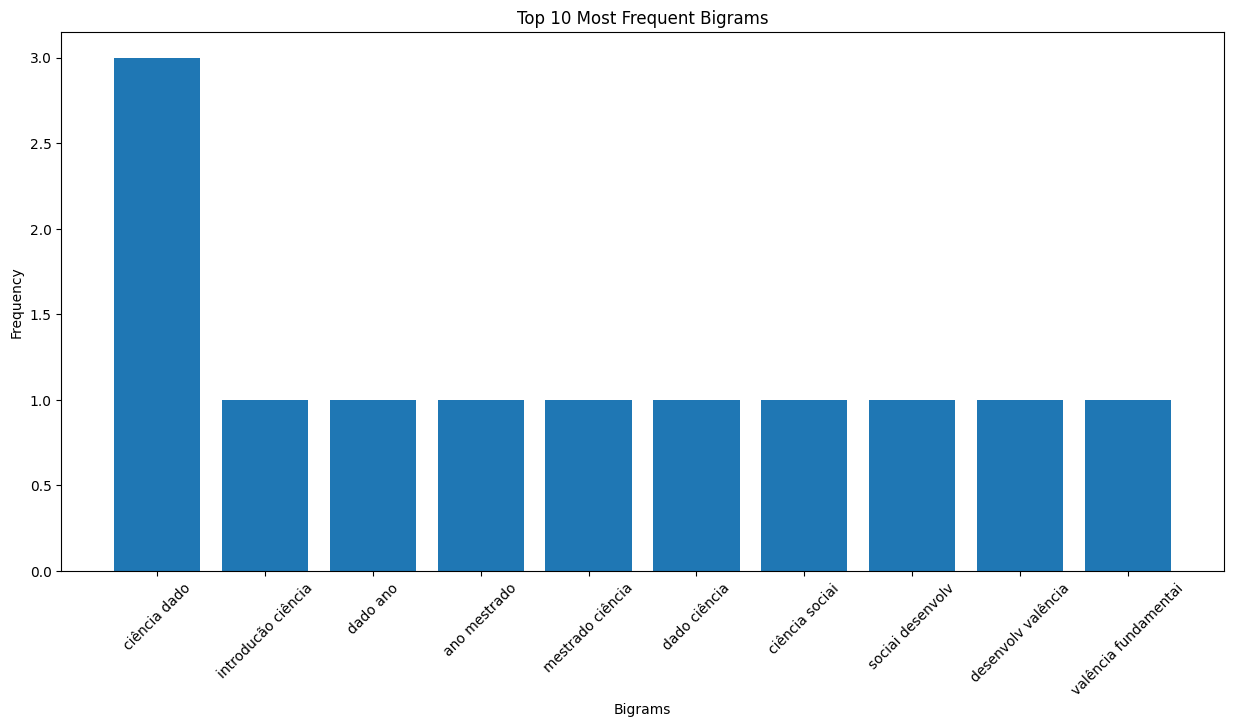

In [192]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the frequency of each bigram
bigram_counts = Counter(bigrams)

# Sort bigrams by frequency
sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)

# Prepare data for plotting
labels, values = zip(*sorted_bigrams)

# Convert tuple labels to string labels
str_labels = [f"{x[0]} {x[1]}" for x in labels]

# Create the plot
plt.figure(figsize=(15, 7))
plt.bar(str_labels[:10], values[:10])  # Top 10 most frequent bigrams
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Bigrams')
plt.xticks(rotation=45)
plt.show()


### Bag of Words
Bag of Words (BoW) represents text data as a 'bag' of its words, disregarding grammar and word order.

- 1-gram

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform([text_pre_proc])
print("Bag of Words:", bow_matrix.toarray())


Bag of Words: [[1 1 4 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1]]


Visualization of the bag of Words - **1 gram**

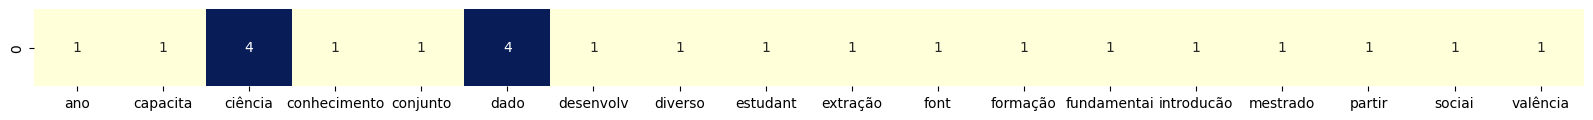

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform([text_pre_proc])

# Convert to DataFrame
df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Generate the heatmap
plt.figure(figsize=(20, 1))  # Adjust the figure size
sns.heatmap(df, annot=True, cmap="YlGnBu", cbar=False)

plt.show()


- 2-grams

In [177]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer with ngram_range set to (3, 3) for 3-grams
vectorizer = CountVectorizer(ngram_range=(2, 2))

# Fit and transform the text
bow_matrix = vectorizer.fit_transform([text_pre_proc])

# Convert to array and print
print("Bag of Words with 2-grams:", bow_matrix.toarray())

# To see the feature names (the actual 2-grams)
print("Feature names:", vectorizer.get_feature_names_out())


Bag of Words with 2-grams: [[1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
Feature names: ['ano mestrado' 'capacita estudant' 'ciência dado' 'ciência sociai'
 'conhecimento partir' 'conjunto font' 'dado ano' 'dado capacita'
 'dado ciência' 'desenvolv valência' 'diverso conjunto'
 'estudant extração' 'extração conhecimento' 'font dado'
 'formação ciência' 'fundamentai formação' 'introducão ciência'
 'mestrado ciência' 'partir diverso' 'sociai desenvolv'
 'valência fundamentai']


Visualization of the bag of Words - **2 grams**

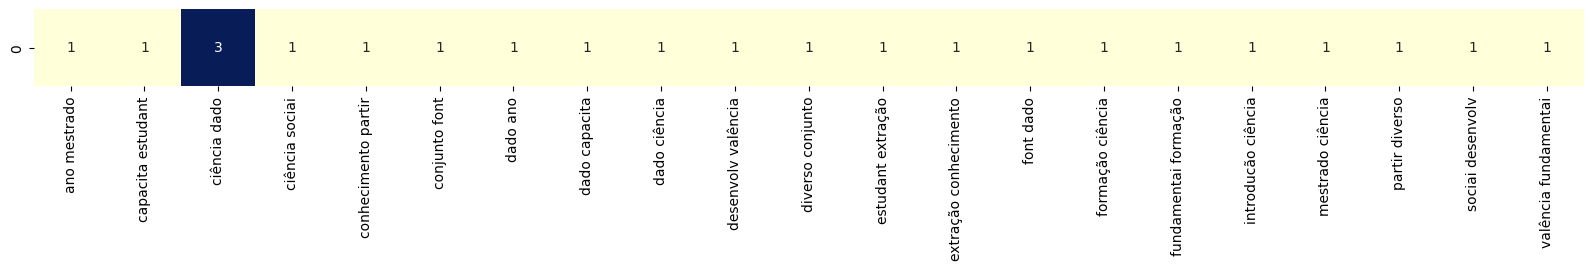

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer with ngram_range set to (2, 2) for 2-grams
vectorizer = CountVectorizer(ngram_range=(2, 2))

# Fit and transform the text
bow_matrix = vectorizer.fit_transform([text_pre_proc])

# Convert to DataFrame
df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Generate the heatmap
plt.figure(figsize=(20, 1))  # Adjust the figure size
sns.heatmap(df, annot=True, cmap="YlGnBu", cbar=False)

plt.show()


### Term Frequency (TF)
Term Frequency measures how frequently a term occurs in a document.

In [160]:
sample_text1 = "objetivos fundamentais"
sample_text2 = "destacar importância dado informação processos decisão"
sample_text3 = "apresentar técnica ferramentas metodologias transmitindo fundamentos base"
sample_text4 = "analisar crítica aplicação diferentes métodos interpretação divulgação resultados contexto desafios problemas apresentados"

In [161]:
# Convert all documents to lowercase
documents = [doc.lower() for doc in [text_pre_proc, sample_text1, sample_text2, sample_text3, sample_text4]]
documents

['introducão ciência dado ano mestrado ciência dado ciência sociai desenvolv valência fundamentai formação ciência dado capacita estudant extração conhecimento partir diverso conjunto font dado',
 'objetivos fundamentais',
 'destacar importância dado informação processos decisão',
 'apresentar técnica ferramentas metodologias transmitindo fundamentos base',
 'analisar crítica aplicação diferentes métodos interpretação divulgação resultados contexto desafios problemas apresentados']

In [162]:
from collections import Counter

# Tokenize each document in the documents list
tokenized_documents = [doc.split() for doc in documents]

# Tokenize the first document in the documents list
text_tokens = documents[0].split()

# Count the frequency of each word
word_counts = Counter(text_tokens)

# Calculate the total number of words
total_words = len(text_tokens)

# Calculate Term Frequency (TF) for each word
term_frequency = {word: count / total_words for word, count in word_counts.items()}

print(f"Term Frequency: {term_frequency}")


Term Frequency: {'introducão': 0.041666666666666664, 'ciência': 0.16666666666666666, 'dado': 0.16666666666666666, 'ano': 0.041666666666666664, 'mestrado': 0.041666666666666664, 'sociai': 0.041666666666666664, 'desenvolv': 0.041666666666666664, 'valência': 0.041666666666666664, 'fundamentai': 0.041666666666666664, 'formação': 0.041666666666666664, 'capacita': 0.041666666666666664, 'estudant': 0.041666666666666664, 'extração': 0.041666666666666664, 'conhecimento': 0.041666666666666664, 'partir': 0.041666666666666664, 'diverso': 0.041666666666666664, 'conjunto': 0.041666666666666664, 'font': 0.041666666666666664}


**TF Frequency Distribution**

The code snippet plots the frequency of each word in the given sample text

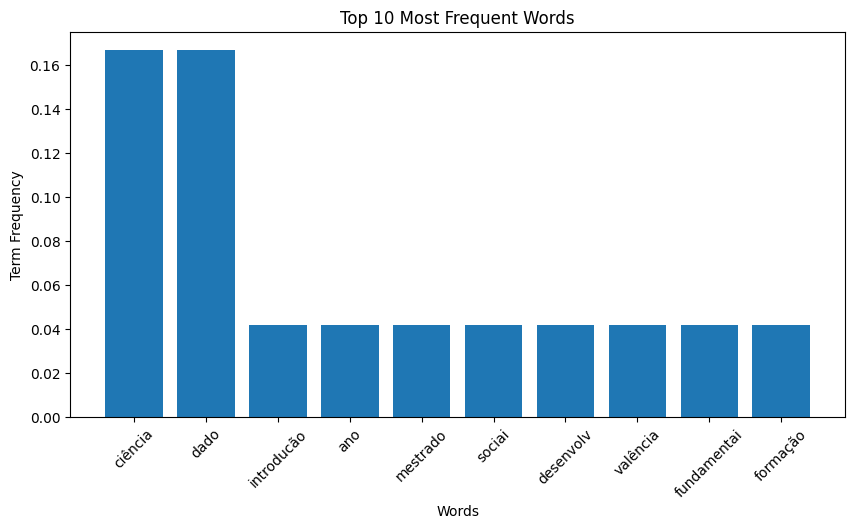

In [163]:
import matplotlib.pyplot as plt

# Sort the dictionary by frequency
sorted_tf = {k: v for k, v in sorted(term_frequency.items(), key=lambda item: item[1], reverse=True)}

# Prepare data for plotting
labels, values = zip(*sorted_tf.items())

# Create the plot
plt.figure(figsize=(10, 5))
plt.bar(labels[:10], values[:10])  # Top 10 most frequent words
plt.xlabel('Words')
plt.ylabel('Term Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()


### Inverse Document Frequency (IDF)
IDF measures how important a term is across multiple documents. It's often used in tandem with TF.

In [164]:
from collections import Counter

# Convert all documents to lowercase
documents = [doc.lower() for doc in [sample_text1, sample_text2, sample_text3, sample_text4]]

# Tokenize and count words for each document
tf_values = [Counter(doc.split()) for doc in documents]

# Calculate IDF values
all_words = set(word for doc in tf_values for word in doc.keys())
idf_values = {}
N = len(documents)

for word in all_words:
    df = sum(word in doc for doc in tf_values)
    idf_values[word] = math.log(N / df)

# Convert to DataFrame for better visualization
idf_df = pd.DataFrame(list(idf_values.items()), columns=['Word', 'IDF Value'])

# Sort the DataFrame by IDF Value in descending order for better visualization
idf_df = idf_df.sort_values('IDF Value', ascending=False)

# Display the table
print(idf_df)

             Word  IDF Value
0    apresentados   1.386294
14        técnica   1.386294
25     apresentar   1.386294
24   metodologias   1.386294
23           dado   1.386294
22    importância   1.386294
21           base   1.386294
20      problemas   1.386294
19     resultados   1.386294
18       destacar   1.386294
17    ferramentas   1.386294
16       desafios   1.386294
15   fundamentais   1.386294
13      objetivos   1.386294
1      informação   1.386294
12        crítica   1.386294
11     diferentes   1.386294
10      aplicação   1.386294
9        contexto   1.386294
8      divulgação   1.386294
7        analisar   1.386294
6   interpretação   1.386294
5       processos   1.386294
4    transmitindo   1.386294
3         decisão   1.386294
2         métodos   1.386294
26    fundamentos   1.386294


In [158]:
import math
from collections import Counter
import pandas as pd

# Convert all documents to lowercase
documents = [doc.lower() for doc in [sample_text1, sample_text2, sample_text3, sample_text4]]

# Tokenize and count words for each document
tf_values = [Counter(doc.split()) for doc in documents]

# Calculate IDF values
all_words = set(word for doc in tf_values for word in doc.keys())
idf_values = {}
N = len(documents)

for word in all_words:
    df = sum(word in doc for doc in tf_values)
    idf_values[word] = math.log(N / df)

# Calculate TF-IDF values
tf_idf_values = []

for tf in tf_values:
    tf_idf = {}
    for word, count in tf.items():
        tf_idf[word] = count * idf_values[word]
    tf_idf_values.append(tf_idf)

# Convert to DataFrame for better visualization
tf_idf_df = pd.DataFrame(tf_idf_values)

# Replace NaN with 0
tf_idf_df.fillna(0, inplace=True)

print(tf_idf_df)


   objetivos  fundamentais  destacar  importância     dados  informação  \
0   1.386294      1.386294  0.000000     0.000000  0.000000    0.000000   
1   0.000000      0.000000  1.386294     1.386294  1.386294    1.386294   
2   0.000000      0.000000  0.000000     0.000000  0.000000    0.000000   
3   0.000000      0.000000  0.000000     0.000000  0.000000    0.000000   

   processos   decisão  apresentar  técnicas  ...  diferentes   métodos  \
0   0.000000  0.000000    0.000000  0.000000  ...    0.000000  0.000000   
1   1.386294  1.386294    0.000000  0.000000  ...    0.000000  0.000000   
2   0.000000  0.000000    1.386294  1.386294  ...    0.000000  0.000000   
3   0.000000  0.000000    0.000000  0.000000  ...    1.386294  1.386294   

   interpretação  divulgação  resultados   obtidos  contexto  desafios  \
0       0.000000    0.000000    0.000000  0.000000  0.000000  0.000000   
1       0.000000    0.000000    0.000000  0.000000  0.000000  0.000000   
2       0.000000    0.0000

**IDF Frequency Distribution**

The code snippet plots the frequency of each word in the given sample text

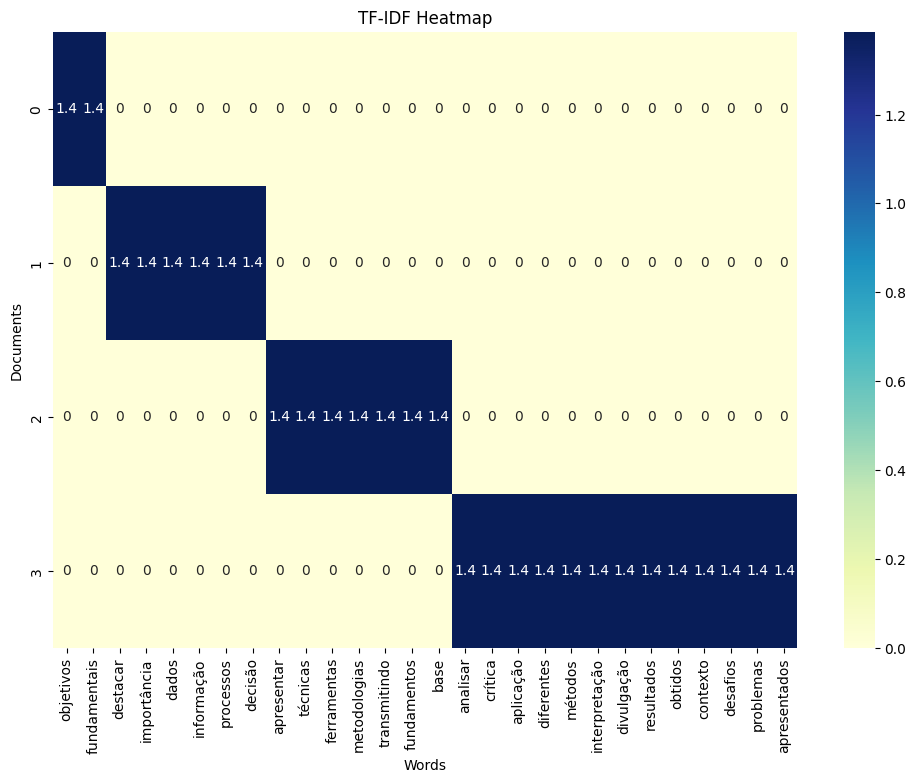

In [167]:
# Using the DataFrame from the previous example (tf_idf_df)
plt.figure(figsize=(12, 8))
sns.heatmap(tf_idf_df, annot=True, cmap="YlGnBu", cbar=True)
plt.title('TF-IDF Heatmap')
plt.xlabel('Words')
plt.ylabel('Documents')
plt.show()


### 4. Term Frequency-Inverse Document Frequency (TF-IDF)
TF-IDF is a combination of TF and IDF, often used for text mining tasks.

In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)
print("TF-IDF Matrix:", tfidf_matrix.toarray())


TF-IDF Matrix: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.70710678 0.         0.         0.
  0.         0.         0.         0.70710678 0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.40824829 0.40824829 0.         0.40824829 0.
  0.         0.         0.         0.         0.40824829 0.40824829
  0.         0.         0.         0.         0.         0.40824829
  0.         0.         0.        ]
 [0.         0.         0.         0.37796447 0.37796447 0.
  0.         0.         0.         0.         0.         0.
  0.         0.37796447 0.         0.37796447 0.         0.
  0.         0.37796447 0.         0.         0.         0.
  0.         0.37796447 0.37796447]
 [0.28867513 0.28867513 0.28867513 0.         0.         0.28867513
  0.28867513 0.         0.         0.28867513 0.         0.28867513
  0.2

Visualization of the TF-IDF

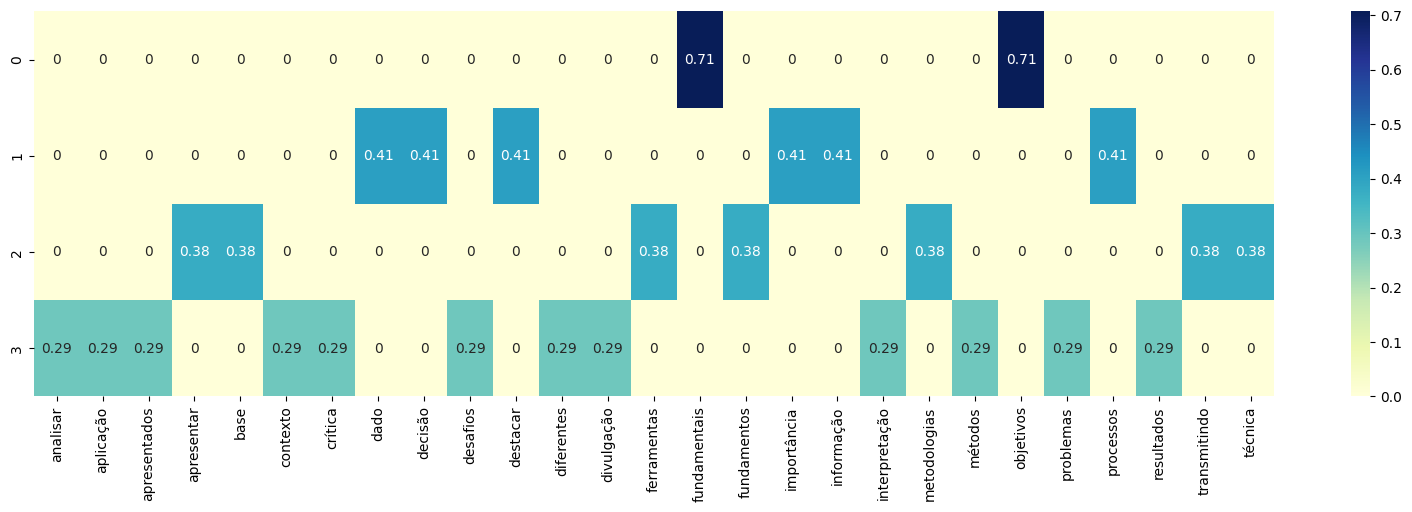

In [169]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assume 'documents' is your list of text documents
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# Convert to DataFrame
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Generate the heatmap
plt.figure(figsize=(20, 5))  # Adjust the figure size
sns.heatmap(df_tfidf, annot=True, cmap="YlGnBu", cbar=True)

plt.show()



### 6. Sentiment Analysis
Sentiment Analysis aims to determine the attitude or emotion of the writer.

In [213]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment for each document in the list
for i, doc in enumerate(documents):
    sentiment = sia.polarity_scores(doc)
    print(f"Sentiment for document {i+1}: {sentiment}")


Sentiment for document 1: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment for document 2: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment for document 3: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment for document 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\JLM\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Visualization of the sentiment anlysis

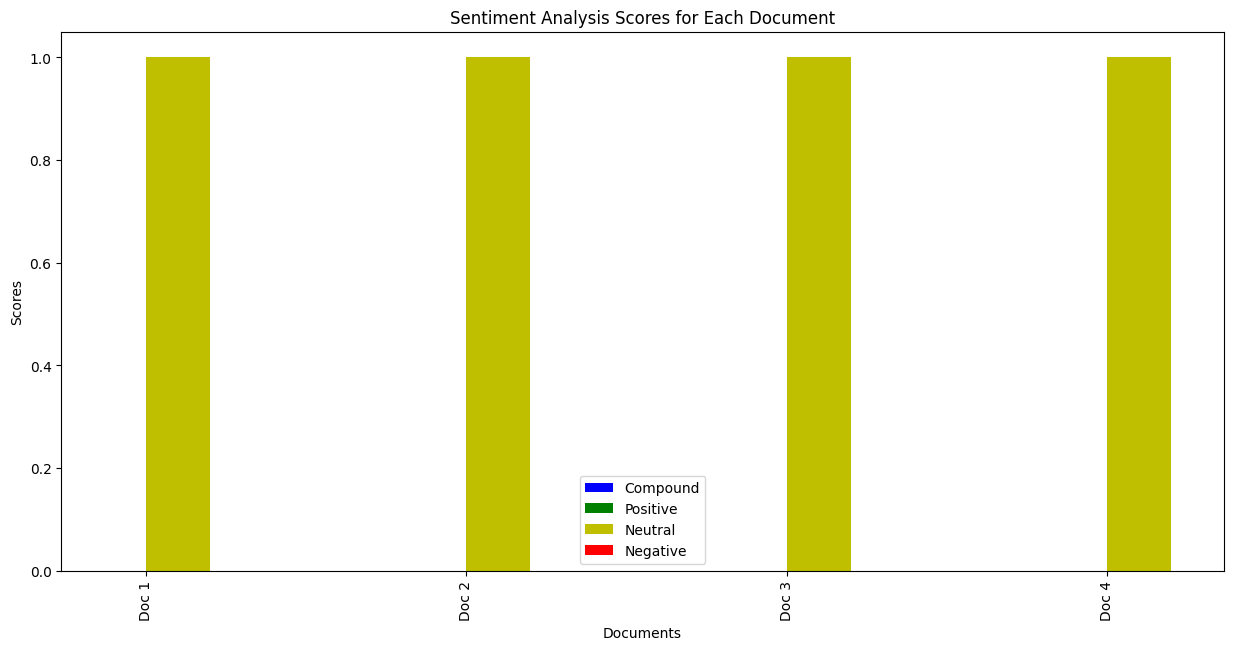

In [209]:
import matplotlib.pyplot as plt

# Initialize lists to store sentiment components
compound_scores = []
positive_scores = []
neutral_scores = []
negative_scores = []

# Analyze sentiment for each document in the list
for i, doc in enumerate(documents):
    sentiment = sia.polarity_scores(doc)
    compound_scores.append(sentiment['compound'])
    positive_scores.append(sentiment['pos'])
    neutral_scores.append(sentiment['neu'])
    negative_scores.append(sentiment['neg'])

# Create the plot
labels = [f"Doc {i+1}" for i in range(len(documents))]
x = range(len(labels))

plt.figure(figsize=(15, 7))

plt.bar(x, compound_scores, width=0.2, label='Compound', color='b', align='center')
plt.bar(x, positive_scores, width=0.2, label='Positive', color='g', align='edge')
plt.bar(x, neutral_scores, width=0.2, label='Neutral', color='y', align='edge')
plt.bar(x, negative_scores, width=0.2, label='Negative', color='r', align='edge')

plt.xlabel('Documents')
plt.ylabel('Scores')
plt.title('Sentiment Analysis Scores for Each Document')
plt.xticks(x, labels, rotation='vertical')
plt.legend()
plt.show()


### 7. Word Embedding
Word Embeddings are a type of word representation that captures semantic meanings of words.

In [198]:
#!pip install gensim 

In [202]:
from gensim.models import Word2Vec

# Tokenize and lowercase each document in the documents list
tokenized_documents = [doc.lower().split() for doc in documents]

# Train a Word2Vec model
model = Word2Vec(tokenized_documents, min_count=1)

# Access the word embedding for the word 'dados'
if 'dados' in model.wv:
    print("Word Embedding for 'dados':", model.wv['dados'])
else:
    print("The word 'dados' is not in the vocabulary.")


The word 'dados' is not in the vocabulary.


Visualization of the word Embeddings

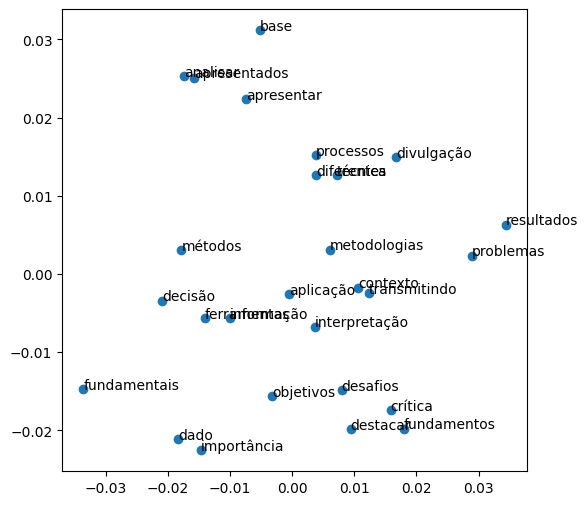

In [203]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Get all the keys (words) from the vocabulary
words = list(model.wv.index_to_key)

# Get the corresponding vectors for each word
word_vectors = [model.wv[word] for word in words]

# Perform PCA to reduce dimensions
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

# Create a scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(result[:, 0], result[:, 1])

# Annotate each point with its corresponding word
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()


## Part-of-Speech Tagging
Understanding the distribution of different parts-of-speech (nouns, verbs, adjectives, etc.) can provide insights into the grammatical structure of the text.

In [206]:
# Perform part-of-speech tagging using nltk
nltk.download('averaged_perceptron_tagger')
pos_tags = nltk.pos_tag(words)

# Count the frequency of each part-of-speech tag
pos_freq = Counter(tag for word, tag in pos_tags)
pos_freq


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\JLM\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Counter({'NN': 18, 'JJ': 3, 'NNS': 2, 'VBP': 2, 'RB': 1, 'VBZ': 1})

Visualization of Part-of-Speech

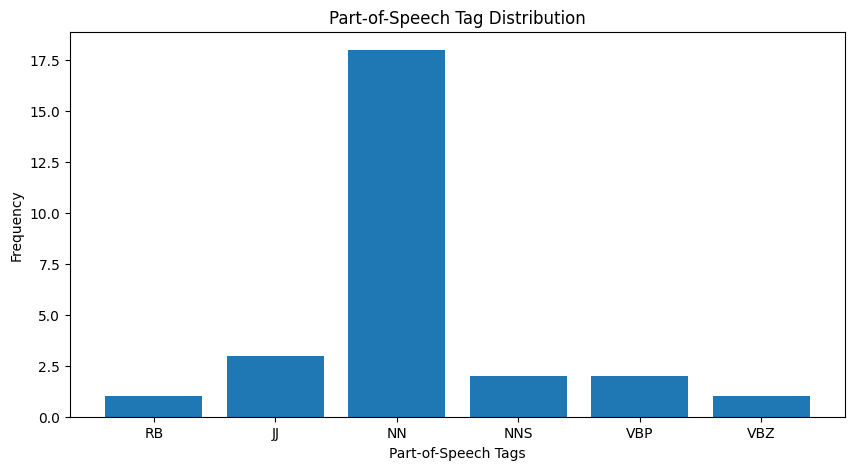

In [207]:
# Create the plot
plt.figure(figsize=(10, 5))
plt.bar(pos_freq.keys(), pos_freq.values())
plt.xlabel('Part-of-Speech Tags')
plt.ylabel('Frequency')
plt.title('Part-of-Speech Tag Distribution')
plt.show()